In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

def imshow(image=None, title="", size=10,  axis=False, cmap=None):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w / h
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), cmap=cmap)
  plt.title(title)
  plt.axis(axis)
  plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Face and Eye detection with Haar Cascade Classifiers, then vehicle and pedestrian detection**

use concept of sliding window

![](https://www.researchgate.net/publication/317012786/figure/fig3/AS:497336300589057@1495585622811/Haar-like-features-9-of-the-pixels-in-the-black-rectangular-regions-are-subtracted.png)

In [14]:
# download and unzip file in google coolab

# !gdown --id 1_X-V1Lp6qMAl_-9opsseieprD3Lhdq8U
# !unzip -q '/content/haarcascades.zip'

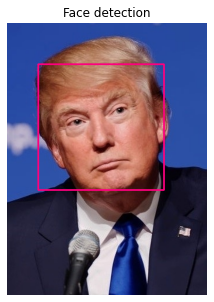

In [45]:
face_classifier = cv.CascadeClassifier("/content/drive/MyDrive/Haarcascades/haarcascade_frontalface_default.xml")

img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/Trump.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Haat cascade is way faster with grayScale image
#scale factor is sensitive to image size and lower value is mean more sensetive
faces = face_classifier.detectMultiScale(img_gray, scaleFactor=1.3, minNeighbors=5)
#output --> array:[w, y, h, w]

# The truth value of an array with more than one element is ambiguous.
# Use array.any() or array.all()
# if not faces.any():
#   print("No faces found")

if faces.any():
  # Now we Iterate  throw the faces and draw rectangle over face
  for (x, y, h, w) in faces:
    cv.rectangle(img, (x, y), (x+w, y+h), (127, 0, 255), 2)

  imshow(img, "Face detection", size=5)

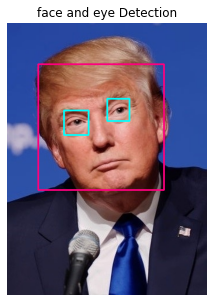

In [46]:
face_classifier = cv.CascadeClassifier("/content/drive/MyDrive/Haarcascades/haarcascade_frontalface_default.xml")
eye_classifier = cv.CascadeClassifier("/content/drive/MyDrive/Haarcascades/haarcascade_eye.xml")

img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/Trump.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(img_gray, 1.3, 5)

if faces.any():
  for (x, y, h, w) in faces:
    cv.rectangle(img, (x, y), (x+h, y+w), (127, 0, 255), 2)
    # croping face out then feed that face to eye classsifier
    roi_color = img[y:y+w, x:x+h]
    roi_gray = img_gray[y:y+w, x:x+h]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.2)
    for (xe, ye, he, we) in eyes:
      cv.rectangle(roi_color, (xe, ye), (xe+he, ye+we), (255, 255, 0), 2)
else:
  print("No faces found")

imshow(img, "face and eye Detection", size=5)

**Using Colab's Code Snippets let's access the webcam for an input**


In [47]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


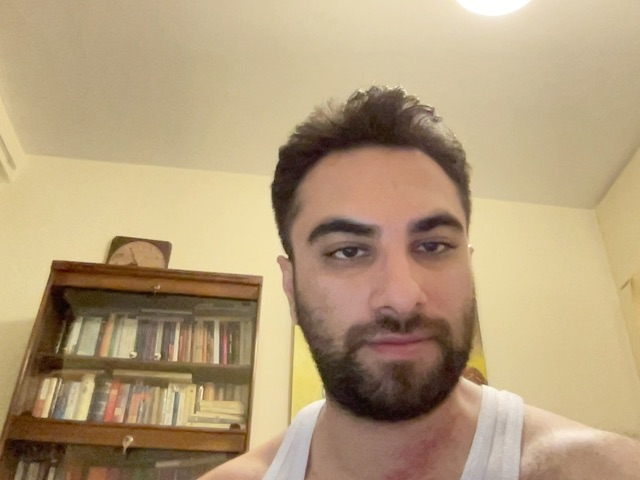

In [52]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

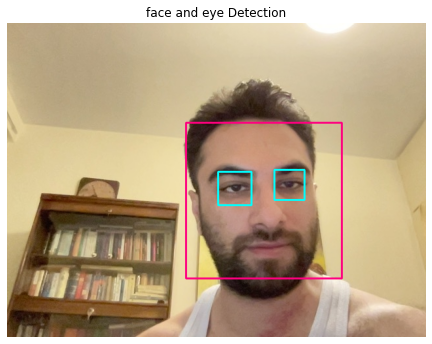

In [53]:
face_classifier = cv.CascadeClassifier("/content/drive/MyDrive/Haarcascades/haarcascade_frontalface_default.xml")
eye_classifier = cv.CascadeClassifier("/content/drive/MyDrive/Haarcascades/haarcascade_eye.xml")

img = cv.imread("/content/photo.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(img_gray, 1.3, 5)

if faces.any():
  for (x, y, h, w) in faces:
    cv.rectangle(img, (x, y), (x+h, y+w), (127, 0, 255), 2)
    # croping face out then feed that face to eye classsifier
    roi_color = img[y:y+w, x:x+h]
    roi_gray = img_gray[y:y+w, x:x+h]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.2)
    for (xe, ye, he, we) in eyes:
      cv.rectangle(roi_color, (xe, ye), (xe+he, ye+we), (255, 255, 0), 2)
else:
  print("No faces found")

imshow(img, "face and eye Detection")

In [54]:
# this will work on your local machin not colab

# face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
# eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

# def face_detector(img, size=0.5):
#     # Convert image to grayscale
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     faces = face_classifier.detectMultiScale(gray, 1.3, 5)
#     if faces is ():
#         return img
    
#     for (x,y,w,h) in faces:
#         x = x - 50
#         w = w + 50
#         y = y - 50
#         h = h + 50
#         cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = img[y:y+h, x:x+w]
#         eyes = eye_classifier.detectMultiScale(roi_gray)
        
#         for (ex,ey,ew,eh) in eyes:
#             cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
#     roi_color = cv2.flip(roi_color,1)
#     return roi_color

# cap = cv2.VideoCapture(0)

# while True:

#     ret, frame = cap.read()
#     cv2.imshow('Our Face Extractor', face_detector(frame))
#     if cv2.waitKey(1) == 13: #13 is the Enter Key
#         break
        
# cap.release()
# cv2.destroyAllWindows()      

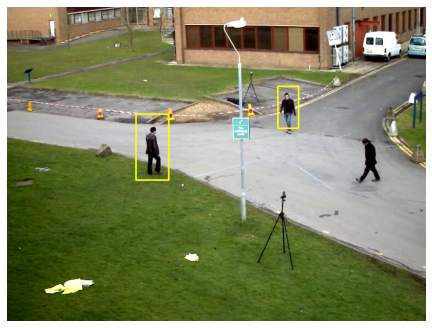

In [64]:
cap = cv.VideoCapture("/content/drive/MyDrive/images_modernComputerVision/walking.avi")

body_classifier = cv.CascadeClassifier("/content/drive/MyDrive/Haarcascades/haarcascade_fullbody.xml")

# read the first frame of the video
ret, frame = cap.read()
# ret --> bloolean

if ret:
  gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
  bodies = body_classifier.detectMultiScale(gray, 1.2, 3)
  for (x, y, h, w) in bodies:
    cv.rectangle(frame, (x, y), (x+h, y+w), (0, 255, 255), 2)
  
cap.release()
imshow(frame)

In [74]:
cap = cv.VideoCapture("/content/drive/MyDrive/images_modernComputerVision/walking.avi")

w, h = int(cap.get(3)), int(cap.get(4))

#parameters --> first: name, second:format, third:frame per second
out = cv.VideoWriter("walking_out.avi", cv.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (w, h))

body_classifier = cv.CascadeClassifier("/content/drive/MyDrive/Haarcascades/haarcascade_fullbody.xml")

while True:
  ret, frame = cap.read()
  if ret:
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)
    for (x, y, h, w) in bodies:
      cv.rectangle(frame, (x, y), (x+h, y+w), (0, 255, 255), 2)
    
    out.write(frame)
  else:
    break

cap.release()
out.release()

## **Play video on colab**
1.   convert avi to mp4
2.   load the html plugin in iPython
3.   display html video player




In [76]:
!ffmpeg -i /content/walking_out.avi pedestrian_output.mp4 -y
# !ffmpeg -i file path fileName.mp4 -y

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [77]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('cars_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [78]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

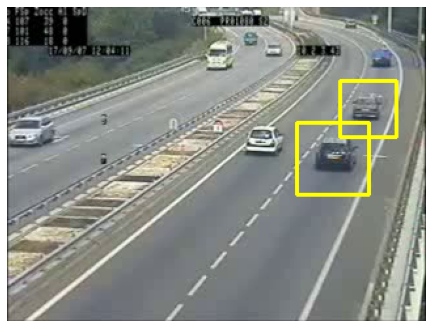

In [80]:
cap = cv.VideoCapture("/content/drive/MyDrive/images_modernComputerVision/cars.avi")

car_classifier = cv.CascadeClassifier("//content/drive/MyDrive/Haarcascades/haarcascade_car.xml")

# read the first frame of the video
ret, frame = cap.read()
# ret --> bloolean

if ret:
  gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
  cars = car_classifier.detectMultiScale(gray, 1.2, 3)
  for (x, y, h, w) in cars:
    cv.rectangle(frame, (x, y), (x+h, y+w), (0, 255, 255), 2)
  
cap.release()
imshow(frame)

In [85]:
cap = cv.VideoCapture("/content/drive/MyDrive/images_modernComputerVision/cars.avi")

w, h = int(cap.get(3)), int(cap.get(4))

#parameters --> first: name, second:format, third:frame per second
out = cv.VideoWriter("car_out.avi", cv.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (w, h))

car_classifier = cv.CascadeClassifier("//content/drive/MyDrive/Haarcascades/haarcascade_car.xml")

while True:
  ret, frame = cap.read()
  if ret:
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cars = car_classifier.detectMultiScale(gray, 1.2, 3)
    for (x, y, h, w) in cars:
      cv.rectangle(frame, (x, y), (x+h, y+w), (0, 255, 255), 2)
    
    out.write(frame)
  else:
    break

cap.release()
out.release()

In [86]:
!ffmpeg -i /content/car_out.avi car_output.mp4 -y

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [87]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/car_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [88]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
np.arange(25)reshape(5)